In [2]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
eda_dpp_utils = importlib.import_module('eda_dpp_utils')
feature_eng_utils = importlib.import_module('feature_eng_utils')

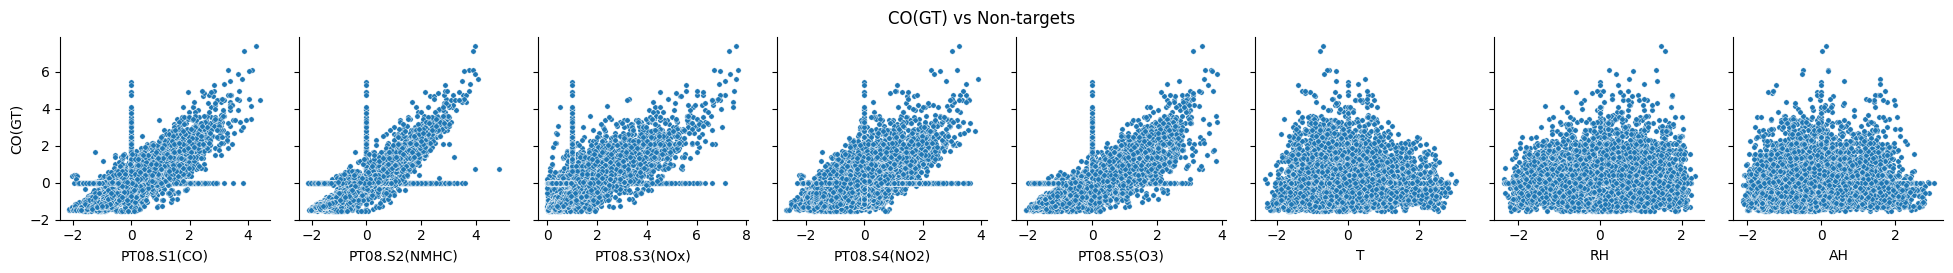

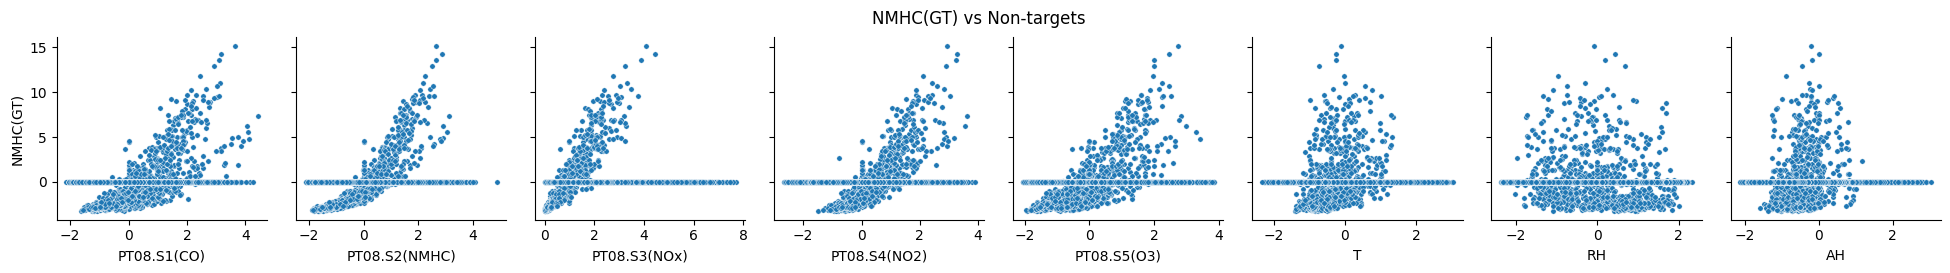

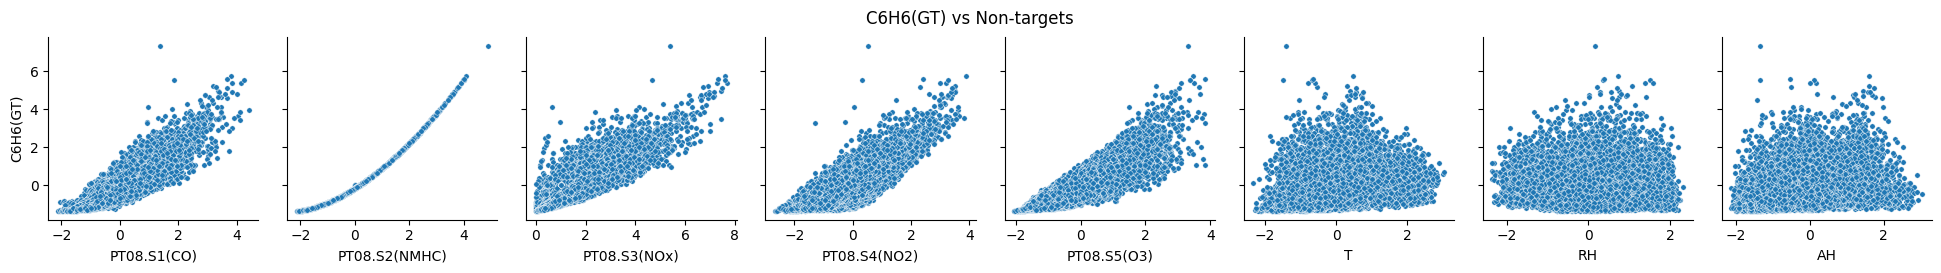

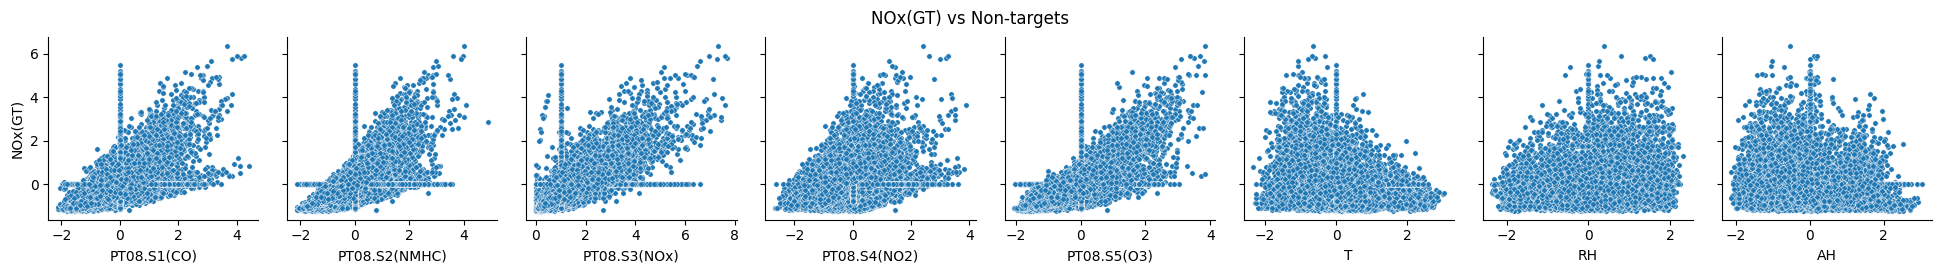

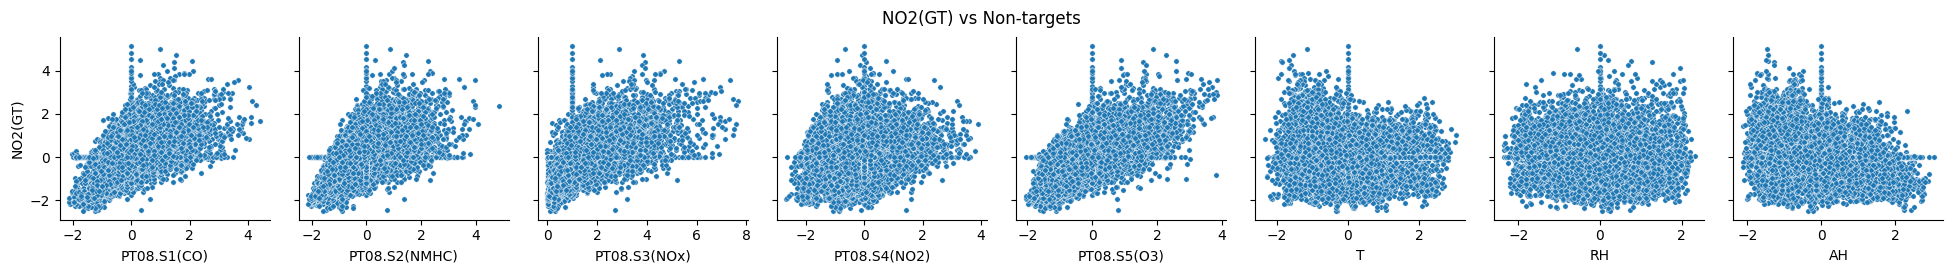

"\nNote: T,RH,AH are weakly correlated and can't find a feature transform to improve correlation.\n"

In [12]:

df, df_unnormalised, numeric_cols = eda_dpp_utils.preProcessing()

x = 'PT08.S3(NOx)'
df[x] = np.exp(- df[x])
targets = [c for c in df.columns if '(GT)' in c].copy()
eda_dpp_utils.scatter_targetNontarget(df)

"""
Note: T,RH,AH are weakly correlated and can't find a feature transform to improve correlation.
"""

      target        feature  correlation
0     CO(GT)     CO(GT)_MA1     1.000000
1     CO(GT)     CO(GT)_MA7     0.650362
2     CO(GT)    CO(GT)_MA24     0.468369
3     CO(GT)    CO(GT)_lag1     0.813848
4     CO(GT)    CO(GT)_lag2     0.586973
5     CO(GT)    CO(GT)_lag3     0.418473
6   NMHC(GT)   NMHC(GT)_MA1     1.000000
7   NMHC(GT)   NMHC(GT)_MA7     0.582514
8   NMHC(GT)  NMHC(GT)_MA24     0.385826
9   NMHC(GT)  NMHC(GT)_lag1     0.771258
10  NMHC(GT)  NMHC(GT)_lag2     0.479108
11  NMHC(GT)  NMHC(GT)_lag3     0.282592
12  C6H6(GT)   C6H6(GT)_MA1     1.000000
13  C6H6(GT)   C6H6(GT)_MA7     0.657914
14  C6H6(GT)  C6H6(GT)_MA24     0.479463
15  C6H6(GT)  C6H6(GT)_lag1     0.836395
16  C6H6(GT)  C6H6(GT)_lag2     0.610979
17  C6H6(GT)  C6H6(GT)_lag3     0.433732
18   NOx(GT)    NOx(GT)_MA1     1.000000
19   NOx(GT)    NOx(GT)_MA7     0.779425
20   NOx(GT)   NOx(GT)_MA24     0.661901
21   NOx(GT)   NOx(GT)_lag1     0.874734
22   NOx(GT)   NOx(GT)_lag2     0.744236
23   NOx(GT)   N

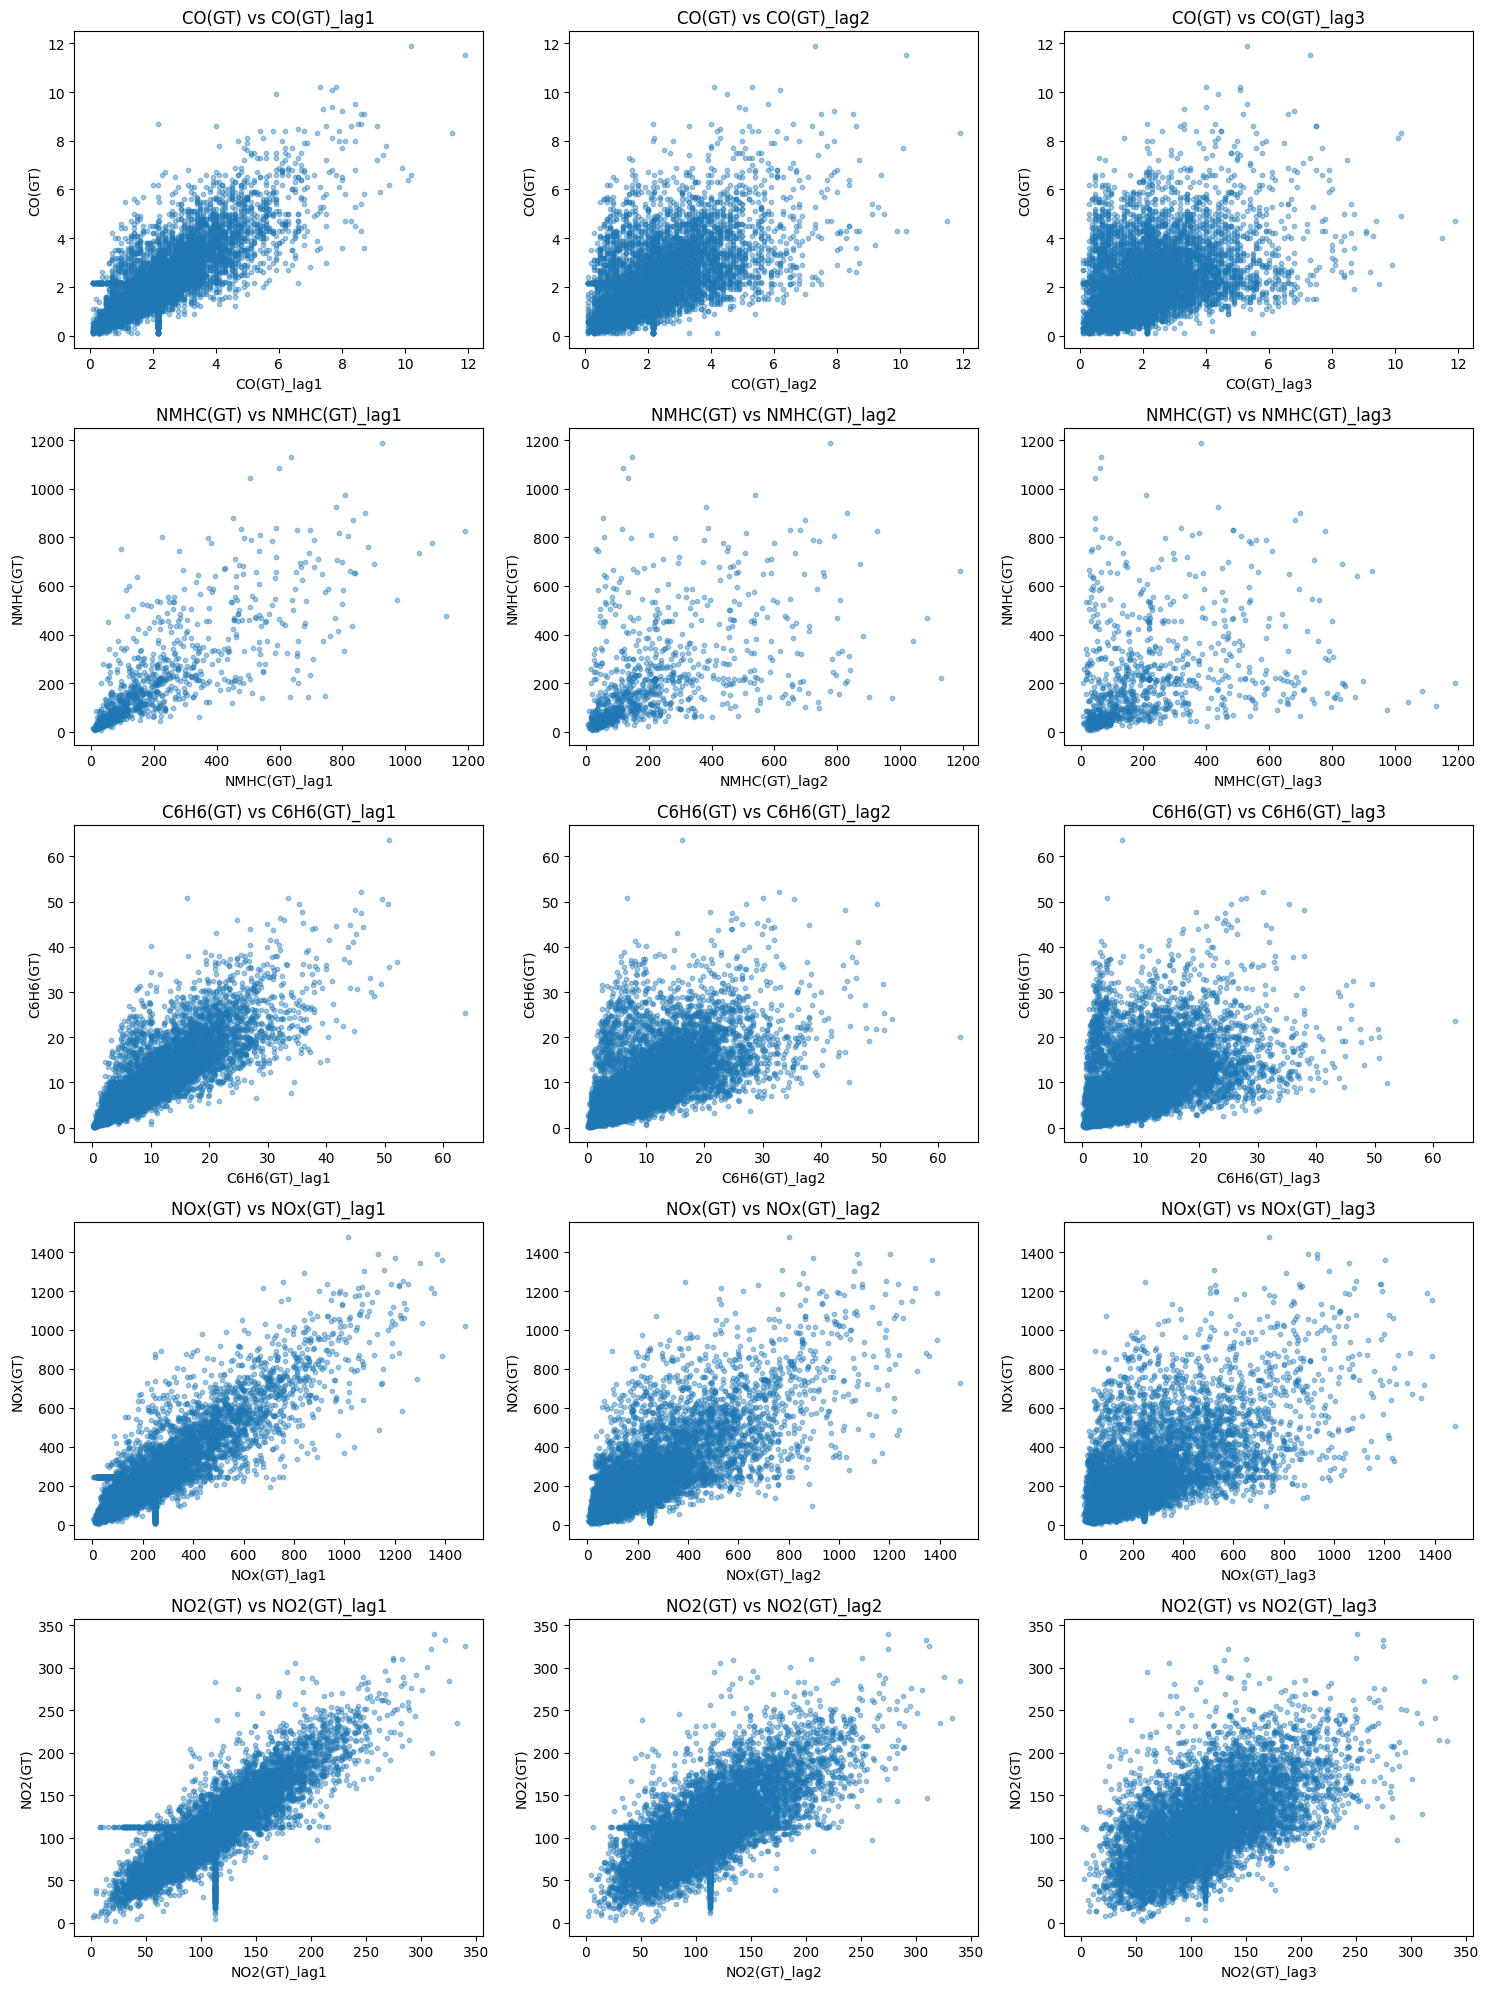

'\nNotes: keep lag 1, since daily avg is moderate correlation\n'

In [5]:
# Lagged variables
df, df_unnormalised, numeric_cols = eda_dpp_utils.preProcessing()

windows = [1, 7, 24]
lags = [1, 2, 3]
original_targets = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# Add MA and lag features
df = feature_eng_utils.addMovingAverages(df_unnormalised, windows, original_targets)
df = feature_eng_utils.addLagFeatures(df_unnormalised, lags, original_targets)

corr_df = feature_eng_utils.LagMACorrelations(df, original_targets)
print(corr_df)
feature_eng_utils.plot_lag_scatter(df, original_targets, lags)
"""
Notes: keep lag 1, since daily avg is moderate correlation
"""